<a href="https://colab.research.google.com/github/ricardincas1987/WhatsAppAnalisis/blob/main/Whatsapp_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿ Cómo descargar los chats de whatsapp ?**

https://youtu.be/ML1r34qdqXA

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone https://github.com/MaartenGr/soan.git

Cloning into 'soan'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 159 (delta 24), reused 21 (delta 21), pack-reused 125
Receiving objects: 100% (159/159), 8.75 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=664462279278f77b8242009bb214800848454d56e41dd86ba93b6f9420f02123
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
from soan.soan.whatsapp import helper      # Helper to prepare the data
from soan.soan.whatsapp import general     # General statistics
from soan.soan.whatsapp import tf_idf      # Calculate uniqueness
from soan.soan.whatsapp import topic       # Topic modeling
from soan.soan.whatsapp import sentiment   # Sentiment analyses
from soan.soan.whatsapp import wordcloud   # Sentiment-based Word Clouds
from soan.soan.whatsapp import emoji       # To analyze emoji use
from soan.soan.colors   import colors      # Frequent Color Visualization
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline

df = helper.import_data('whatsapp.txt')
df = helper.preprocess_data(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(5)

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week
1688,0,1/10/21 08:20 - +593 98 622 8706: Muy buenos d...,+593 98 622 8706,Muy buenos días,muy buenos das,2021-01-10 08:20:00,8,6
1756,0,1/10/21 08:56 - +57 304 4713929: Deseándote un...,+57 304 4713929,"Deseándote un excelente día, te comparto la ag...",desendote un excelente da te comparto la agend...,2021-01-10 08:56:00,8,6
5,4,1/10/21 09:05 - James Pratt: 😆\n,James Pratt,😆,,2021-01-10 09:05:00,9,6
1810,1,1/10/21 09:12 - +593 93 991 9798: Este meme es...,+593 93 991 9798,Este meme es nivel medio nomás,este meme es nivel medio noms,2021-01-10 09:12:00,9,6
1361,2,1/10/21 13:12 - +593 98 467 6730: Pero tengo q...,+593 98 467 6730,Pero tengo que sacar visa!!!,pero tengo que sacar visa,2021-01-10 13:12:00,13,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369 entries, 1688 to 855
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              4369 non-null   int64         
 1   Message_Raw        4369 non-null   object        
 2   User               4369 non-null   object        
 3   Message_Clean      4369 non-null   object        
 4   Message_Only_Text  4369 non-null   object        
 5   Date               4369 non-null   datetime64[ns]
 6   Hour               4369 non-null   int64         
 7   Day_of_Week        4369 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 307.2+ KB


In [ ]:
df['fecha'] = df['Date'].dt.date
df['fecha']=pd.to_datetime(df['fecha'], format='%Y/%m/%d')

In [ ]:
df2021 = df[df["fecha"]<"2022-01-01"]

In [ ]:
df = df2021.copy()

In [ ]:
df["mes"] = df["Date"].dt.month

In [ ]:
df = df.set_index("fecha")

In [ ]:
from matplotlib.pyplot import xticks
import numpy as np

mes = pd.DataFrame(df["mes"].value_counts()).reset_index()

mes.sort_values("index",inplace=True)

In [ ]:
mes

,index,mes
9,1,86
10,2,78
7,3,101
8,4,91
4,5,216
6,6,166
11,7,70
5,8,212
3,9,223
2,10,606


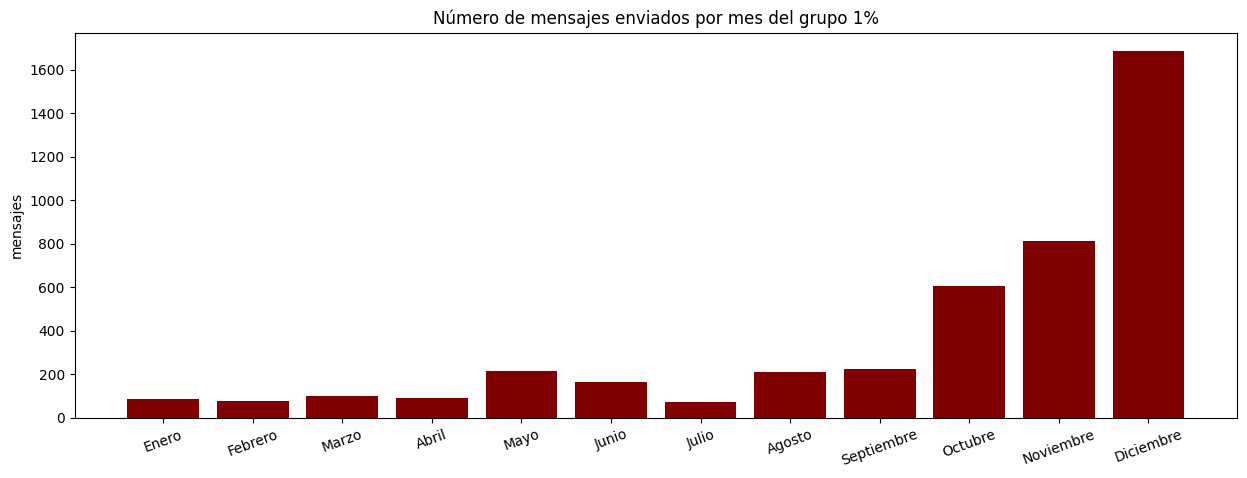

In [ ]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(mes["index"], mes["mes"], color ='maroon') #,width = 0.4)
locs, labels = xticks()  # Get the current locations and labels.
xticks([1, 2,3,4,5,6,7,8,9,10,11,12], ['Enero', 'Febrero', 'Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'],rotation=20)  # Set text labels and properties.
plt.ylabel('mensajes')
plt.title('Número de mensajes enviados por mes del grupo 1%')
plt.show()


In [ ]:
df.groupby("User").agg("count").sort_values("Date",ascending = False).head(10).reset_index()

,User,index,Message_Raw,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week,mes
0,James Pratt,477,477,477,477,477,477,477,477
1,Xavier Miranda,416,416,416,416,416,416,416,416
2,Masapp,374,374,374,374,374,374,374,374
3,Paola Traverso,278,278,278,278,278,278,278,278
4,Susy,226,226,226,226,226,226,226,226
5,+593 99 305 5209,225,225,225,225,225,225,225,225
6,+593 98 861 8785,173,173,173,173,173,173,173,173
7,Milenko Surati,169,169,169,169,169,169,169,169
8,+593 93 991 9798,169,169,169,169,169,169,169,169
9,+593 99 842 6126,114,114,114,114,114,114,114,114


In [ ]:
top10 = df.groupby("User").agg("count").sort_values("index",ascending = False).head(10).reset_index()["User"]
top10

0         James Pratt
1      Xavier Miranda
2              Masapp
3      Paola Traverso
4                Susy
5    +593 99 305 5209
6    +593 98 861 8785
7      Milenko Surati
8    +593 93 991 9798
9    +593 99 842 6126
Name: User, dtype: object

In [ ]:
df1 = df[df["User"].isin(top10)].copy()

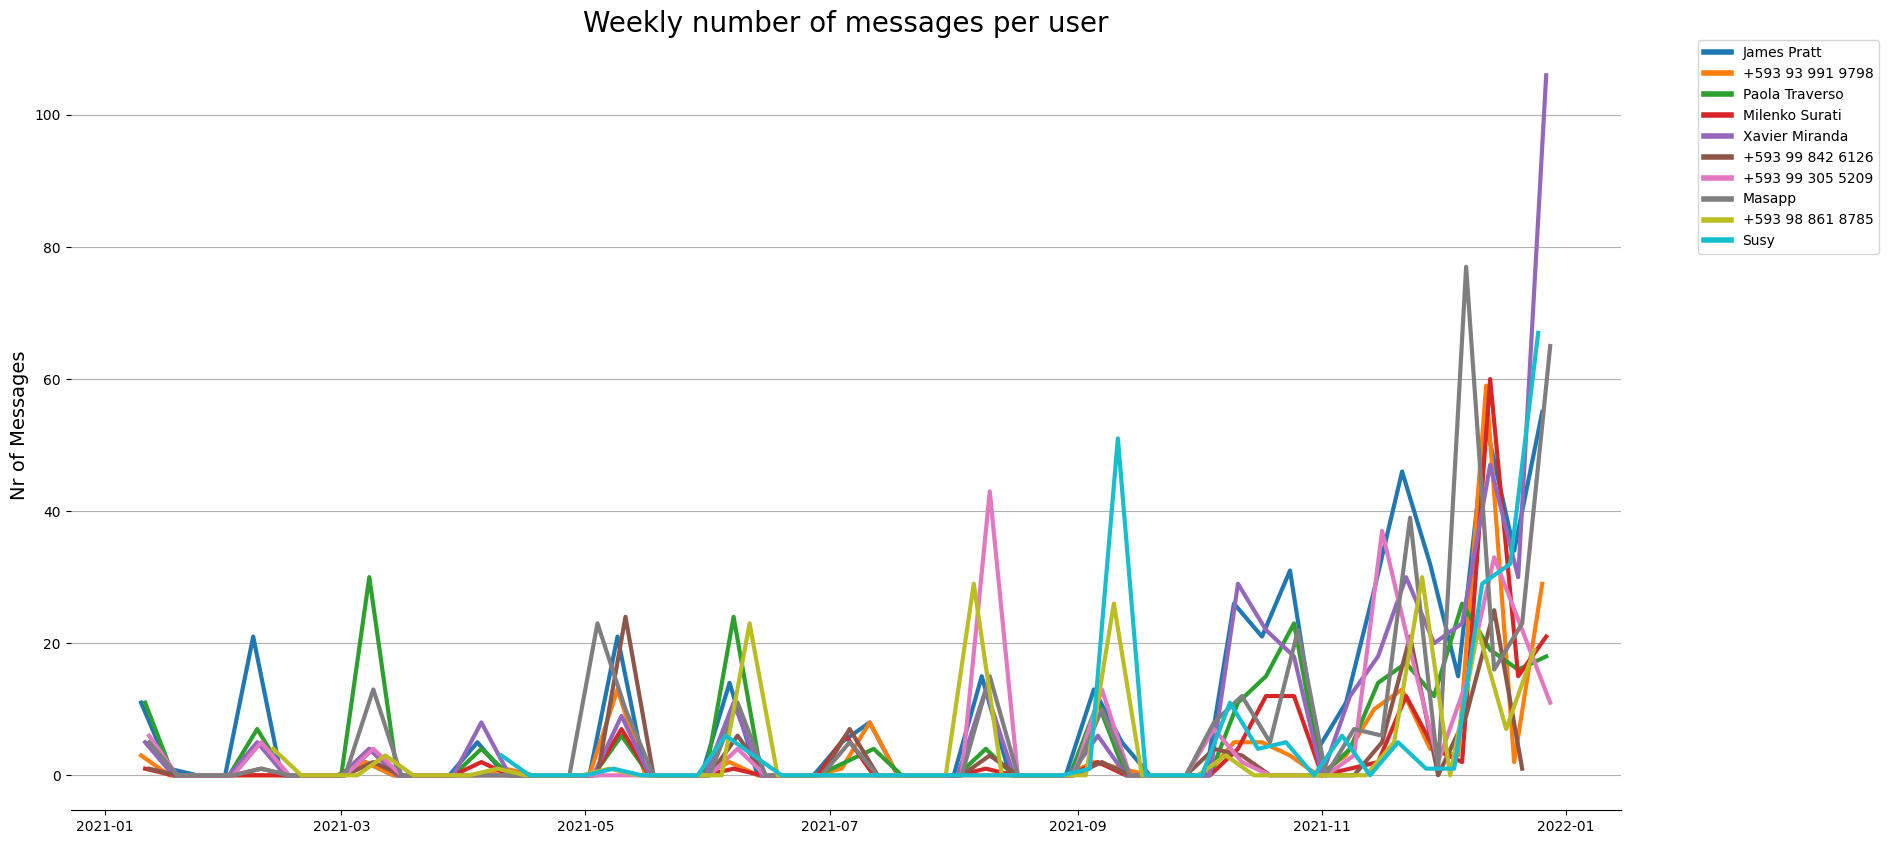

In [ ]:
general.plot_messages(df1, colors=None, trendline=False, savefig=False, dpi=100)

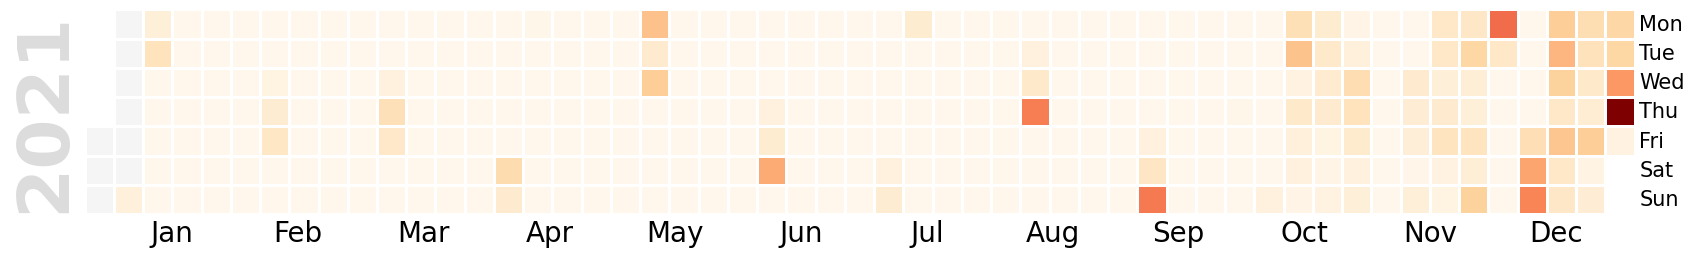

In [ ]:
general.calendar_plot(df, year=2021, how='count', column="index")

In [ ]:
mascara = df['User'].str.contains("Masapp", case=False)

In [ ]:
df[mascara]

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week,mes
fecha,,,,,,,,,
2021-01-12,189,1/12/21 18:37 - Masapp - Roberto Esteves: invi...,Masapp,1/12/21 18:37 - Masapp - Roberto Esteves: invi...,masapp roberto esteves invitados al evento...,2021-01-12 18:37:00,18,1,1
2021-01-12,188,1/12/21 18:37 - Masapp - Roberto Esteves: http...,Masapp,1/12/21 18:37 - Masapp - Roberto Esteves: http...,masapp roberto esteves httpswwweventbritee...,2021-01-12 18:37:00,18,1,1
2021-01-12,190,1/12/21 18:38 - Masapp - Roberto Esteves: hoy ...,Masapp,1/12/21 18:38 - Masapp - Roberto Esteves: hoy ...,masapp roberto esteves hoy,2021-01-12 18:38:00,18,1,1
2021-01-12,191,1/12/21 18:51 - Masapp - Roberto Esteves: está...,Masapp,1/12/21 18:51 - Masapp - Roberto Esteves: está...,masapp roberto esteves est orientado a que...,2021-01-12 18:51:00,18,1,1
2021-01-12,192,1/12/21 20:42 - Masapp - Roberto Esteves: pare...,Masapp,1/12/21 20:42 - Masapp - Roberto Esteves: pare...,masapp roberto esteves parece viejo el anu...,2021-01-12 20:42:00,20,1,1
...,...,...,...,...,...,...,...,...,...
2021-12-30,421,30/12/21 16:57 - Masapp - Roberto Esteves: Ya ...,Masapp,30/12/21 16:57 - Masapp - Roberto Esteves: Ya ...,masapp roberto esteves ya sabe,2021-12-30 16:57:00,16,3,12
2021-12-30,424,30/12/21 23:55 - Masapp - Roberto Esteves: @59...,Masapp,30/12/21 23:55 - Masapp - Roberto Esteves: @59...,masapp roberto esteves seguimos esperando...,2021-12-30 23:55:00,23,3,12
2021-12-30,425,30/12/21 23:56 - Masapp - Roberto Esteves: El ...,Masapp,30/12/21 23:56 - Masapp - Roberto Esteves: El ...,masapp roberto esteves el viejo truco,2021-12-30 23:56:00,23,3,12


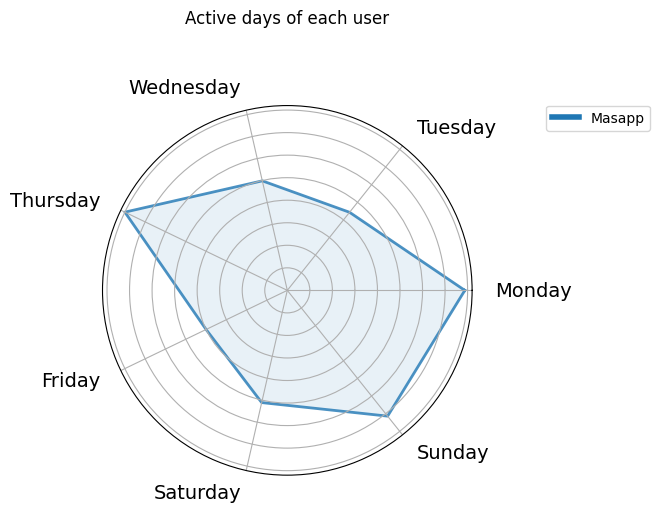

In [ ]:
general.plot_day_spider(df[mascara], colors=None, savefig=False, dpi=100)

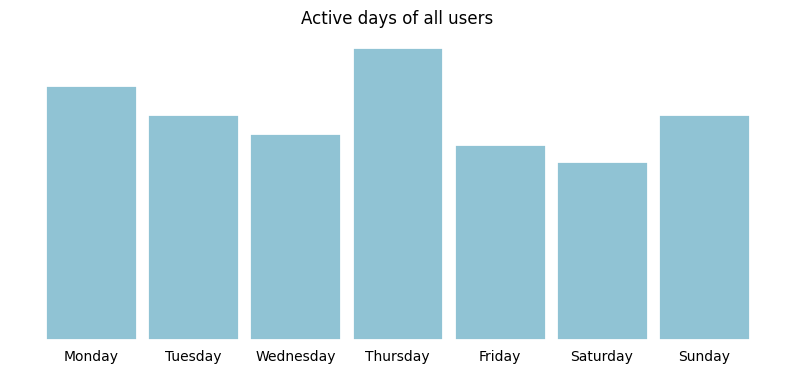

In [ ]:
general.plot_active_days(df, savefig=False, dpi=100, user="All")

#general.plot_active_days(df1[mascara], savefig=False, dpi=100, user="All")

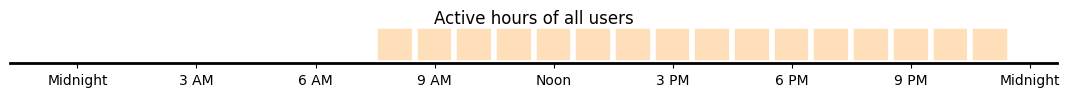

In [ ]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

In [ ]:
#general.print_stats(df1)

In [ ]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language="spanish", column="Word")

In [ ]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [ ]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

+593 98 622 8706
+57 304 4713929
James Pratt
+593 93 991 9798
+593 98 467 6730
+593 99 929 6796
Jessica Hidalgo
+593 98 122 5970
Cambió tu código de seguridad con +593 98 656 5465. Toca para obtener más información.

+593 99 381 4745
+593 97 863 7491
Paola Traverso
Milenko Surati
Cambió tu código de seguridad con +52 55 1474 0772. Toca para obtener más información.

+52 55 1474 0772
Marco Calvache
Xavier Miranda
+593 99 842 6126
+593 98 280 5003
+593 99 305 5209
Masapp
+593 99 370 3448
+593 99 570 7702
Xavier Muñoz
+593 99 378 2202
+593 95 891 2968
Erika Avilés
Cambió tu código de seguridad con +593 99 902 7797. Toca para obtener más información.

+1 (809) 449-3103
+52 667 246 3829
+593 98 861 8785
Marco 1%
+593 99 302 1234
+593 99 206 6524
+593 99 902 7797
Nicolás Viteri, 1%
Cambió tu código de seguridad con +593 98 420 0398. Toca para obtener más información.

+593 98 697 0134
+593 99 958 9419
+57 311 8041265
+57 316 3033063
+593 97 930 3030

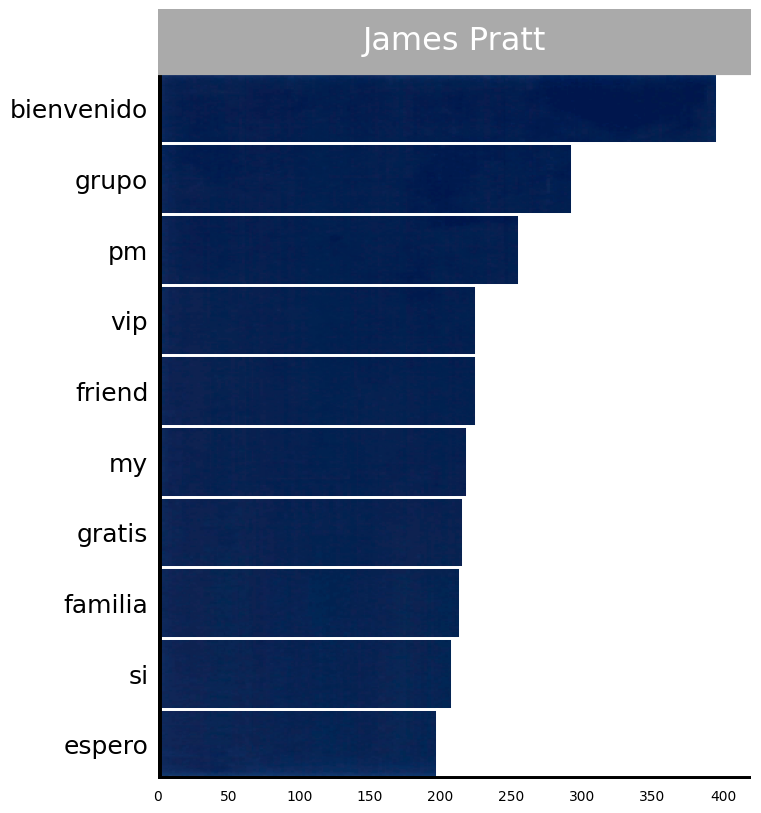

In [ ]:
tf_idf.plot_unique_words(unique_words, 
                         user='James Pratt', 
                         image_path='/content/soan/images/mask.png',
                         image_url=None, 
                         title="James Pratt", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df1['Sentiment'] = df1.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

In [ ]:
df1.head(2)

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week,mes,Sentiment
fecha,,,,,,,,,,
2021-01-10,4,1/10/21 09:05 - James Pratt: 😆\n,James Pratt,😆,,2021-01-10 09:05:00,9,6,1,0.3612
2021-01-10,1,1/10/21 09:12 - +593 93 991 9798: Este meme es...,+593 93 991 9798,Este meme es nivel medio nomás,este meme es nivel medio noms,2021-01-10 09:12:00,9,6,1,0.0000


In [ ]:
sentiment.print_avg_sentiment(df1)

			#######################
			## Average Sentiment ##
			#######################
James Pratt:                  		0.051
+593 93 991 9798:             		-0.013
Paola Traverso:               		0.096
Milenko Surati:               		-0.028
Xavier Miranda:               		0.061
+593 99 842 6126:             		0.009
+593 99 305 5209:             		0.012
Masapp:                       		-0.015
+593 98 861 8785:             		0.041
Susy:                         		0.083





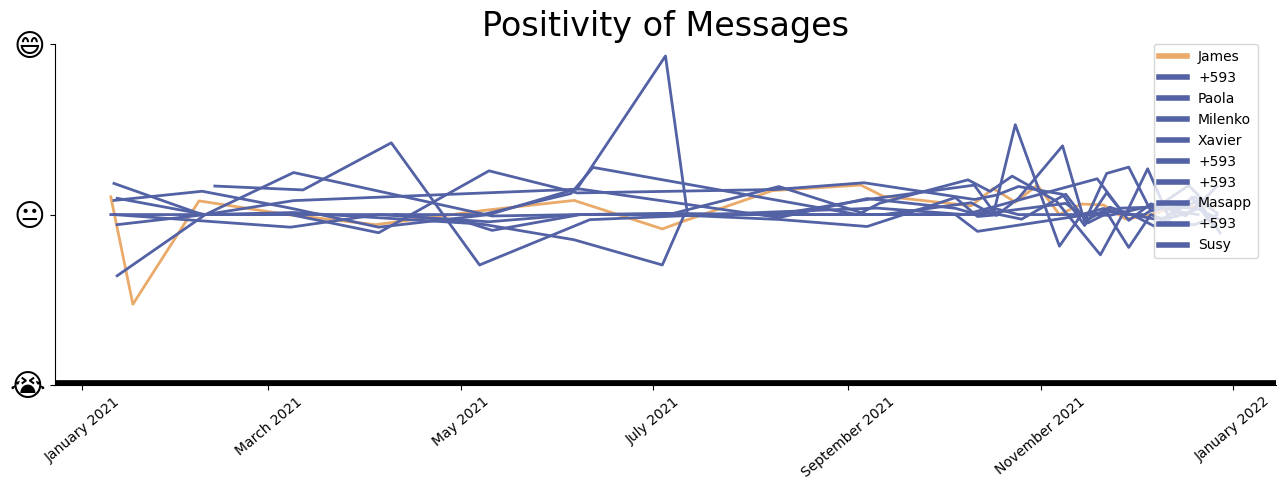

In [ ]:
sentiment.plot_sentiment(df1, colors=['#EAAA69','#5361A5','#5361A5','#5361A5','#5361A5','#5361A5','#5361A5','#5361A5','#5361A5','#5361A5'], savefig=False)

In [ ]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="spanish", column="Word")
words = counts[["Word", "Xavier Miranda"]].set_index('Word').to_dict()["Xavier Miranda"]

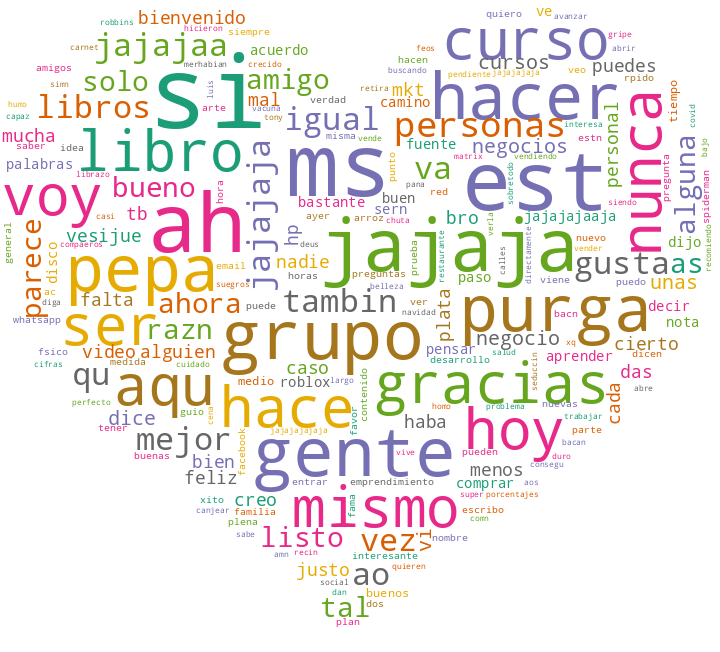

In [ ]:
wordcloud.create_wordcloud(words,random_state=42, mask="/content/soan/images/heart.jpg",
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)